A couple of reasons that I wanted to use this data set are:
1)It's a fairly clean data set.  I am still learning how to analyze data and the cleaner the inital dataset, the better.
2)I think there are some really interesting questions that can be asked here.

The questions I want to ask are:
What is the oldest meteorite to fall to earth?
What is the most recent meteorite to fall to earth?
What is the largest meteorite to fall to earth?
What is the smallest?
What is the average size of meteorites that fall to earth?
What is the median?
What are the quartiles?
What are the outliers?
I want to visualize the sizes with a histogram.
Have meteorites gotten larger or smaller as the years have gone by?
I want to visualize this with a line graph
Are there ares of the the planet that have more meteorite activities than others?

I'm going to start by importing the data and looking at the first five rows.


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

met_df = pd.read_csv('/Users/000057680/Documents/Projects/Jupyter Projects/Meteorite_Landings.csv')
met_df.head()


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [111]:
met_df.info()
met_df['mass (g)'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


1.30       171
1.20       140
1.40       138
2.10       130
2.40       126
          ... 
129.33       1
83.13        1
485.70       1
85.32        1
2167.00      1
Name: mass (g), Length: 12576, dtype: int64

I'm not sure what data is in the id column, so I'm going to drop it.  Also, for the purposes of my analysis, I don't care if the name is valid or not, so that will be dropped as well.  The recclass is another column that holds data that I don't need to answer my questions, so it will be dropped.  Finally, I'm gonig to drop the GeoLocatoin column because the latitude and longitude are held in the "reclat" and "reclong" columns.

In [112]:
met_df = met_df.drop(columns=['id','nametype','recclass', 'GeoLocation'])
met_df.head()

,name,mass (g),fall,year,reclat,reclong
0,Aachen,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,780.0,Fell,1902.0,-33.16667,-64.95000


What are the values of the 'fall' column?

In [113]:
met_df['fall'].value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

Okay, it looks like this column is either showing if the meteor was witnessed to have fallen that year or if it was found that year.  This might have an effect on the data.  Is it possible that a meteor was found several years after it had fallen?  That would rally skew the data for the question about meteorites getting larger or smaller over the years.  When I get to that question, I'm only going to use the 'Fell' rows of the dataset.

With this new information, I'm going to adjust my first two questions to reflect this difference of being found versus being witnessed to fall.

The first question will be revised to: What is the oldest meteroite that was witnessed to have fallen?  What is the oldest meteorite that was found?

In [114]:
met_df = met_df.sort_values(by='year')
met_df.head()

,name,mass (g),fall,year,reclat,reclong
704,Nogata,472.0,Fell,860.0,33.72500,130.75000
679,Narni,NaN,Fell,920.0,42.51667,12.51667
278,Elbogen,107000.0,Fell,1399.0,50.18333,12.73333
856,Rivolta de Bassi,103.3,Fell,1490.0,45.48333,9.51667
283,Ensisheim,127000.0,Fell,1491.0,47.86667,7.35000


The oldest meteorite that was witnessed falling to the earth was the Nogata meteorite, which fell in the 860.  I found this to be very interesting and looked this meteorite up.

From Wikipedia: "It is believed to be the oldest fragment associated with a sighting of a meteor fall. Witnessed by a young boy on May 19, 861, who led others to the impact site, it was accepted as having come from the sky."

This fragment is actually on display and you can view it at a Shinto shrine in Nogata, Japan.

It will be interesting to see how the size of this meteor (472 g) compares to other meteors.

In [115]:
met_df_found = met_df[met_df['fall'] == 'Found']
met_df_found.sort_values(by = 'year')
met_df_found.head()

,name,mass (g),fall,year,reclat,reclong
5365,Campo del Cielo,50000000.0,Found,1575.0,-27.46667,-60.58333
26174,Morito,10100000.0,Found,1600.0,27.05000,-105.43333
37632,Siratik,1700.0,Found,1716.0,14.00000,-11.00000
37719,Steinbach,98000.0,Found,1724.0,50.50000,12.50000
17384,Krasnojarsk,700000.0,Found,1749.0,54.90000,91.80000


Campo del Cielo is not a single meteorite, but rather a group of meteorites.  

From Wikipedia: 'Campo del Cielo refers to a group of iron meteorites and the area in Argentina where they were found. The site straddles the provinces of Chaco and Santiago del Estero, located 1,000 kilometers (620 mi) north-northwest of Buenos Aires, Argentina and approximately 500 kilometres (310 mi) southwest of Asunción, Paraguay. The crater field covers 18.5 by 3 kilometres (11.5 by 1.9 mi) and contains at least 26 craters, the largest being 115 by 91 metres (377 by 299 ft).'

While this meteorite field was found in 1575, it is believed to be 5000 years old.

In [116]:
met_df = met_df.sort_values(by='year', ascending=False)
met_df.head()

,name,mass (g),fall,year,reclat,reclong
30682,Northwest Africa 7701,55.0,Found,2101.0,0.0,0.0
30777,Northwest Africa 7858,459.0,Found,2013.0,0.0,0.0
30781,Northwest Africa 7863,1000.0,Found,2013.0,0.0,0.0
30780,Northwest Africa 7862,317.0,Found,2013.0,0.0,0.0
30779,Northwest Africa 7861,611.0,Found,2013.0,0.0,0.0


It looks like the most recent meteorites on record were found in Northwest Africa.  The year 2101 is obviously a typo and should more than likely be 2011, making the meteors found in 2013 the most recent.  What is interesting is that there are latitude and longitude coordinates for the older meteorites that were found or witnessed to fall, but not for these more recent finds.

In [117]:
met_df_fell = met_df[met_df['fall'] == 'Fell']
met_df_fell = met_df_fell.sort_values(by='year', ascending=False)
met_df_fell.head()

,name,mass (g),fall,year,reclat,reclong
194,Chelyabinsk,100000.0,Fell,2013.0,54.81667,61.11667
86,Battle Mountain,2900.0,Fell,2012.0,40.66813,-117.18913
969,Sutter's Mill,992.5,Fell,2012.0,38.80389,-120.90806
138,Boumdeid (2011),3599.0,Fell,2011.0,17.17493,-11.34133
996,Tissint,7000.0,Fell,2011.0,29.48195,-7.61123


It looks like the most recent meteorite in this dataset that was see falling is also from 2013 and it fell on Chelyabinsk, Russia.

From Wikipedia: The Chelyabinsk meteorite (Russian: Челябинский метеорит, Chelyabinskii meteorit) is the fragmented remains of the large Chelyabinsk meteor of 15 February 2013 which reached the ground after the meteor's passage through the atmosphere. The descent of the meteor, visible as a brilliant superbolide in the morning sky, caused a series of shock waves that shattered windows, damaged approximately 7,200 buildings and left 1,491 people injured. The resulting fragments were scattered over a wide area.

With the oldest and most recent meteorites accounted for, I would like to know which meteor was the largest to fall, and while I'm at it, I'll also find the smallest.


In [118]:
met_df['mass (kg)'] = met_df['mass (g)']/1000
met_df = met_df.sort_values(by='mass (g)', ascending=False)
met_df.head()

,name,mass (g),fall,year,reclat,reclong,mass (kg)
16392,Hoba,60000000.0,Found,1920.0,-19.58333,17.91667,60000.0
5373,Cape York,58200000.0,Found,1818.0,76.13333,-64.93333,58200.0
5365,Campo del Cielo,50000000.0,Found,1575.0,-27.46667,-60.58333,50000.0
5370,Canyon Diablo,30000000.0,Found,1891.0,35.05000,-111.03333,30000.0
3455,Armanty,28000000.0,Found,1898.0,47.00000,88.00000,28000.0


In [119]:
met_df_fell['mass (kg)'] = met_df_fell['mass (g)']/1000
met_df_fell = met_df_fell.sort_values(by='mass (g)', ascending=False)
met_df_fell.head()

,name,mass (g),fall,year,reclat,reclong,mass (kg)
920,Sikhote-Alin,23000000.0,Fell,1947.0,46.16000,134.65333,23000.0
419,Jilin,4000000.0,Fell,1976.0,44.05000,126.16667,4000.0
29,Allende,2000000.0,Fell,1969.0,26.96667,-105.31667,2000.0
707,Norton County,1100000.0,Fell,1948.0,39.68333,-99.86667,1100.0
506,Kunya-Urgench,1100000.0,Fell,1998.0,42.25000,59.20000,1100.0


After sorting these dataframes by the mass of the meteorites, I saw that the measurement in grams was far too large of a number to make sense of, so I added a column showing the mass in kilograms.  

The largest meteorite that has been found has a mass of 60,000kg.  It is the Hoba meteorite located in Namibia, South Africa and was found in 1920.

From Wikipedia: The Hoba (/ˈhoʊbə/ HOH-bə) meteorite is named after the farm Hoba West, where it lies, not far from Grootfontein, in the Otjozondjupa Region of Namibia. It has been uncovered, but because of its large mass, has never been moved from where it fell. The main mass is estimated at more than 60 tonnes. It is the largest known intact meteorite (as a single piece) and about twice as massive as the largest fragment of either the Cape York meteorite's 31-tonne Ahnighito kept in the American Museum of Natural History or the Campo del Cielo's 31-tonne Gancedo in Argentina. It is also the most massive naturally occurring piece of iron (actually ferronickel) known on Earth's surface. The name "Hoba" comes from a Khoekhoegowab word meaning "gift". Following its donation to the government in 1987, a visitor centre was constructed with a circular stone access and seating area.

The largest meteorite that was witnessed falling to the earth was the Sikhote-Alin, which has a mass of 23,000kg.  This meteorite was witnessed falling to the ground in 1947 in the Sikhote-Alin mountain range in the Soviet Union.

From Wikipedia: At around 10:30 AM on 12 February 1947, eyewitnesses in the Sikhote-Alin Mountains, Primorye, Soviet Union, observed a large bolide brighter than the sun that came out of the north and descended at an angle of about 41 degrees. The bright flash and the deafening sound of the fall were observed for 300 kilometres (190 mi) around the point of impact not far from Luchegorsk and approximately 440 km (270 mi) northeast of Vladivostok. A smoke trail, estimated at 32 km (20 mi) long, remained in the sky for several hours.

It's pretty interesting that so far, the most recent and the largest meteorites in the dataset are both from Russia.  I wonder if more meteorites fall in the this part of the world than anywhere else.

To find out, I will create a column called "Quadrants" and assign every meteorite the value of "northeast", "northwest", "southeast", or "southwest" depending on their longitude and lattitude.

There were 2,190 meteorites eitehr found or witnessed falling in the NW Hemisphere.  This includes North America, the northernmost tip of South America, the westernmost tip of Africa, Spain, the British Isles, and Iceland.

In [120]:
condition = (met_df['reclat'] > 0)
met_df['N or S Hemisphere'] = np.where(condition, 'North', 'South')
condition = (met_df['reclong'] > 0)
met_df['E or W Hemisphere'] = np.where(condition, 'East', 'West')

met_df.head()

,name,mass (g),fall,year,reclat,reclong,mass (kg),N or S Hemisphere,E or W Hemisphere
16392,Hoba,60000000.0,Found,1920.0,-19.58333,17.91667,60000.0,South,East
5373,Cape York,58200000.0,Found,1818.0,76.13333,-64.93333,58200.0,North,West
5365,Campo del Cielo,50000000.0,Found,1575.0,-27.46667,-60.58333,50000.0,South,West
5370,Canyon Diablo,30000000.0,Found,1891.0,35.05000,-111.03333,30000.0,North,West
3455,Armanty,28000000.0,Found,1898.0,47.00000,88.00000,28000.0,North,East


In [121]:
met_df['quadrant'] = met_df['N or S Hemisphere'].str.cat(met_df['E or W Hemisphere'], sep='-', )

met_df.head()

,name,mass (g),fall,year,reclat,reclong,mass (kg),N or S Hemisphere,E or W Hemisphere,quadrant
16392,Hoba,60000000.0,Found,1920.0,-19.58333,17.91667,60000.0,South,East,South-East
5373,Cape York,58200000.0,Found,1818.0,76.13333,-64.93333,58200.0,North,West,North-West
5365,Campo del Cielo,50000000.0,Found,1575.0,-27.46667,-60.58333,50000.0,South,West,South-West
5370,Canyon Diablo,30000000.0,Found,1891.0,35.05000,-111.03333,30000.0,North,West,North-West
3455,Armanty,28000000.0,Found,1898.0,47.00000,88.00000,28000.0,North,East,North-East


In [122]:
se = met_df[met_df['quadrant'] == 'South-East']
sw = met_df[met_df['quadrant'] == 'South-West']
ne = met_df[met_df['quadrant'] == 'North-East']
nw = met_df[met_df['quadrant'] == 'North-West']

<BarContainer object of 4 artists>

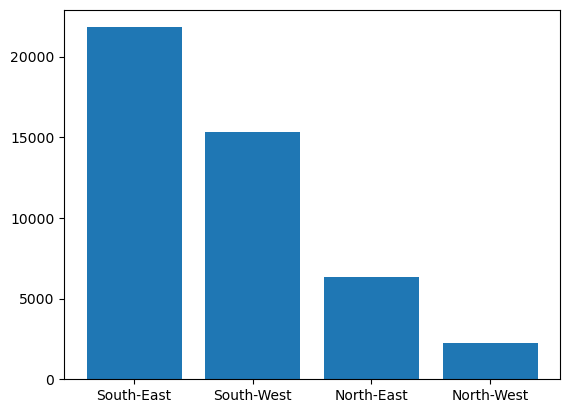

In [123]:
 heights = [len(se), len(sw), len(ne), len(nw)]
quads = ['South-East', 'South-West', 'North-East', 'North-West']
plt.bar(x=quads, height=heights)




The part of the planet that has had the most meteorite activity is the South-East, followed by the South-West.  This means that a vast majority of the meteorites that hit the earth hit below the Equator.

I wonder what percentage of meteorites that hit the earth hit it in below the Equator

In [124]:
round((len(se) + len(sw))/(len(se) + len(sw) + len(ne) + len(nw))*100, 2)


81.3

81.3% of all meteorites that hit the Earth hit it in the Southern Hemisphere.  That's really interesting.  I wonder if this means that you are 4 times more likely to see a meteor shower in the Southern Hemisphere as opposed to the Northern Hemisphere.  That's a question for another time, but according to this data, I would say that assumption could be made.

I'm going to now analyze the mass of the meteorites.  I've already found the largest and the smallest.  I'm going to now find the mean, median, Q1, Q3, and look for any outliers

In [125]:
mass_mean = round(met_df['mass (kg)'].mean(), 3)
print("The mean mass of the meteorites in this dataset is " + str(mass_mean) +'.')
mass_med = round(met_df['mass (kg)'].median(), 3)
print('The median mass of the meteorites in this dataset is ' + str(mass_med) + '.')

The mean mass of the meteorites in this dataset is 13.278.
The median mass of the meteorites in this dataset is 0.033.


The mean is much larger than the median suggesting data that is skewed far to the right.  A dot plot will help to visualize the distribution of masses.

In [126]:
small = int(min(met_df['mass (kg)']))
big = int(max(met_df['mass (kg)']))
print(small)
print(big)

0
60000


In [127]:
met_mass = met_df[(met_df['mass (kg)']>=0)&(met_df['mass (kg)']<=60000)]


In [128]:
met_mass=met_mass['mass (kg)'].astype(int)
met_mass.info()

<class 'pandas.core.series.Series'>
Int64Index: 45585 entries, 16392 to 31066
Series name: mass (kg)
Non-Null Count  Dtype
--------------  -----
45585 non-null  int64
dtypes: int64(1)
memory usage: 712.3 KB


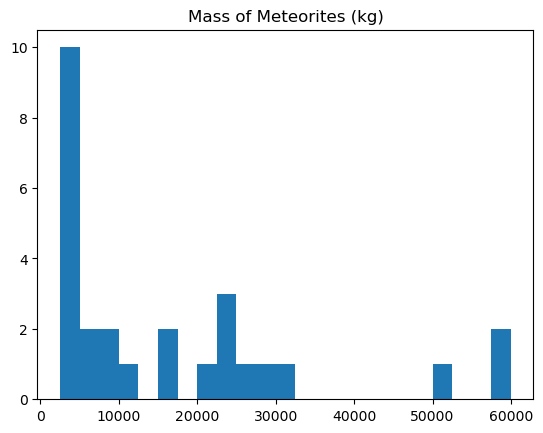

In [129]:
met_mass_kg = met_df[(met_df['mass (kg)']>=0)&(met_df['mass (kg)']<=60000)]
met_mass_kg = met_mass_kg['mass (kg)'].astype(int)
met_mass_kg.head()
binwidth = 500
plt.title("Mass of Meteorites (kg)")
plt.hist(met_mass_kg, bins=[2500, 5000,7500, 10000, 12500, 15000,17500, 20000, 22500, 25000, 27500, 30000,32500, 35000,37500, 40000,42500, 45000,47500, 50000,52500, 55000,57500, 60000])
plt.show()
#range(min(met_mass_kg), max(met_mass_kg) + binwidth, binwidth))

It's clear that the majority of meteorites that fall have a mass that is less than 1kg.  

Because of this, it would not make sense to take measures of centrality using kilograms.

In [137]:
met_mass_g = met_df[(met_df['mass (g)']>0)&(met_df['mass (g)']<=60000000)]
round(np.mean(met_mass_g['mass (g)']), 2)


13283.62

The mean of masses is 13,278.08 grams.  We can see that this is pulled up by the outliers that have masses greater than 50000kg.

In [139]:
np.median(met_mass_g['mass (g)'])
#met_mass_g = met_mass_g.sort_values(by='mass (g)')
#met_mass_g.head()

32.695

While there are certainly some very large meteorites that have hit the Earth, half of them have been less than 32.6 kg in size, which is about the same size as a Golden Retriever.

In [140]:
quart = np.quantile(met_mass_g['mass (g)'], [.25, .75])
Q1 = quart[0]
Q3 = quart[1]
print("Q1 of the data is " + str(Q1))
print("Q3 of the data is " + str(Q3))

Q1 of the data is 7.2
Q3 of the data is 202.8


Q1 of our data is 7.2 grams and the Q3 is 202.6 grams.  This means that 75% of the meteors that have hit the earth are less than 202.6 kg.

In [141]:
iqr = 202.6 - 7.2 
upper_out = round(Q3 + (iqr * 1.5), 2)
lower_out = round(Q1 - (iqr * 1.5), 2)

print("Any meteorite that has a mass of less than " + str(lower_out) + "grams is a lower outlier.")
print("Any meteorite that has a mass of more than " + str(upper_out) + "grams is an upper outlier")

Any meteorite that has a mass of less than -285.9grams is a lower outlier.
Any meteorite that has a mass of more than 495.9grams is an upper outlier


There won't be any lower outliers because it's impossible for something to have negative mass.  However, there are more than likely a few upper outliers.

In [143]:
outliers = met_mass_g[met_mass_g['mass (g)'] >= 495.9]
print("There are " + str(len(outliers)) + " outliers that have a mass of more than 459.9 grams.")

There are 7086 outliers that have a mass of more than 459.9 grams.


<function matplotlib.pyplot.show(close=None, block=None)>

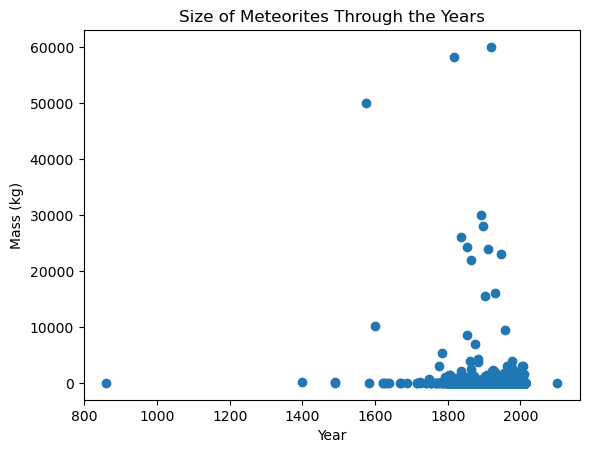

In [149]:
x = met_mass_g['year']
y = met_mass_g['mass (kg)']

plt.scatter(x, y)
plt.title("Size of Meteorites Through the Years")
plt.xlabel("Year")
plt.ylabel('Mass (kg)')
plt.show


A few of final observations from this scatterplot.

1. There is an increase in the number of meteorites both found and witnessed falling as time goes on.  This could be for a multitude of reasons including the invention of the telescope in 1608 and the developments in the field of geology that occured in the late 17th century. 
2. There is a very large gap between the first meteorite in the data, and the second one.  It's very odd that there is no data of meteorite activity during those almost 600 years.  
3. As seen from the analysis of the quartiles, a vast majority of meteorites are smaller than 500kg, which makes those that are larger all the more interesting and frightening.